In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

import seaborn as sn

import warnings

In [3]:
df = pd.read_csv(r"C:\Users\sxoma\Downloads\exams20.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,completed,90,97,96
1,female,group E,some high school,standard,none,65,68,60
2,male,group C,some high school,standard,none,67,73,68
3,male,group C,bachelor's degree,standard,completed,52,56,50
4,male,group A,some college,standard,none,77,87,87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       20 non-null     object
 1   race/ethnicity               20 non-null     object
 2   parental level of education  20 non-null     object
 3   lunch                        20 non-null     object
 4   test preparation course      20 non-null     object
 5   math score                   20 non-null     int64 
 6   reading score                20 non-null     int64 
 7   writing score                20 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 1.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,20.0,63.80,13.276810,41.0,56.50,62.0,70.25,90.0
reading score,20.0,67.40,13.850328,48.0,56.75,67.5,74.75,97.0
writing score,20.0,65.05,14.637641,41.0,50.75,66.5,76.25,96.0


In [6]:
df.describe(include ="object").T

,count,unique,top,freq
gender,20,2,female,10
race/ethnicity,20,5,group D,7
parental level of education,20,5,some high school,5
lunch,20,2,standard,15
test preparation course,20,2,none,12


In [7]:
df.describe()

,math score,reading score,writing score
count,20.00000,20.000000,20.000000
mean,63.80000,67.400000,65.050000
std,13.27681,13.850328,14.637641
min,41.00000,48.000000,41.000000
25%,56.50000,56.750000,50.750000
50%,62.00000,67.500000,66.500000
75%,70.25000,74.750000,76.250000
max,90.00000,97.000000,96.000000


In [8]:
for col in df.columns:
    print(
        f"{col}: {df[col].unique()}",
        end='\n\n'
        )

gender: ['female' 'male']

race/ethnicity: ['group B' 'group E' 'group C' 'group A' 'group D']

parental level of education: ["bachelor's degree" 'some high school' 'some college'
 "associate's degree" 'high school']

lunch: ['standard' 'free/reduced']

test preparation course: ['completed' 'none']

math score: [90 65 67 52 77 59 55 43 71 60 41 88 81 63 49 70 61 57]

reading score: [97 68 73 56 87 48 84 50 64 71 57 60 80 67]

writing score: [96 60 68 50 87 71 48 59 77 46 41 76 65 62 51 79 70]



In [9]:
dfm = df['math score']
dfm

0     90
1     65
2     67
3     52
4     77
5     59
6     55
7     43
8     71
9     60
10    41
11    60
12    88
13    81
14    63
15    49
16    67
17    70
18    61
19    57
Name: math score, dtype: int64

In [10]:
dfm.describe()

count    20.00000
mean     63.80000
std      13.27681
min      41.00000
25%      56.50000
50%      62.00000
75%      70.25000
max      90.00000
Name: math score, dtype: float64

In [11]:
dfm.mean(),  dfm.median() ,dfm.mode()

(63.8,
 62.0,
 0    60
 1    67
 Name: math score, dtype: int64)

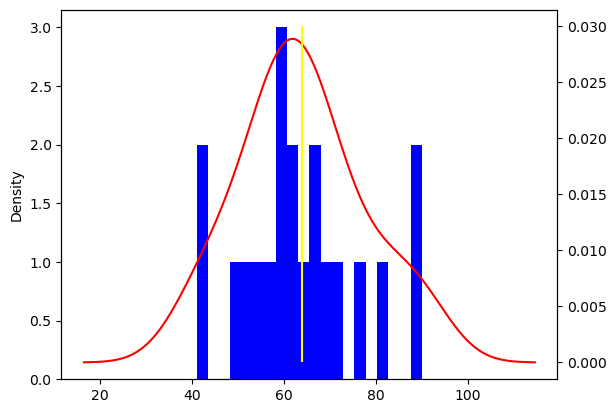

In [12]:
dfm.plot(kind='hist', bins=20, color='blue')

dfm.plot(kind='kde', secondary_y=True, color='red')

plt.vlines(dfm.mean(),ymin=0,ymax=0.03,linewidth=1.5,color='yellow')

In [13]:
def _range(series):
    return series.max()-series.min()

dfm.agg(['min','max','mean','median','std', _range])

min       41.00000
max       90.00000
mean      63.80000
median    62.00000
std       13.27681
_range    49.00000
Name: math score, dtype: float64

In [14]:
#diakimansi


dfm.var()

176.27368421052634

In [15]:
dfm.std()

13.276810016360344

In [16]:
dfm.std(ddof=0)

12.9406336784564

In [17]:
dfm.std() ==np.sqrt(dfm.var())

True

<Axes: >

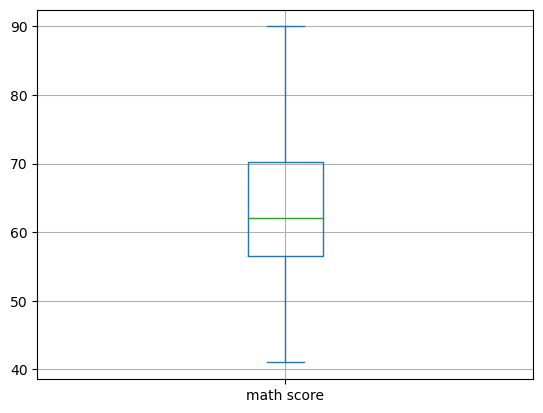

In [18]:
dfm.plot(kind = 'box', grid=True)

In [19]:
dfm.skew()

0.33107627235481607

In [20]:
df.corr()

C:\Users\sxoma\AppData\Local\Temp\ipykernel_21208\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.803864,0.687667
reading score,0.803864,1.000000,0.933960
writing score,0.687667,0.933960,1.000000


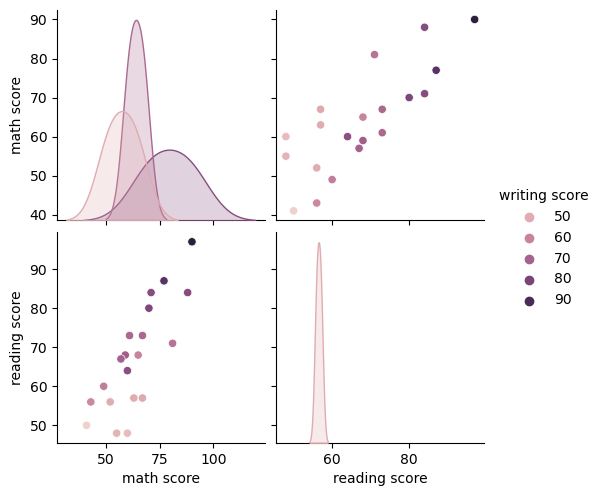

In [22]:
import seaborn as sns
sns.pairplot(df, hue='writing score')

#elego t- test

In [21]:
no_course = df[df['test preparation course']=='none']
no_course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 16
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       12 non-null     object
 1   race/ethnicity               12 non-null     object
 2   parental level of education  12 non-null     object
 3   lunch                        12 non-null     object
 4   test preparation course      12 non-null     object
 5   math score                   12 non-null     int64 
 6   reading score                12 non-null     int64 
 7   writing score                12 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 864.0+ bytes


In [22]:
completed_course = df[df['test preparation course']=='completed']
completed_course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       8 non-null      object
 1   race/ethnicity               8 non-null      object
 2   parental level of education  8 non-null      object
 3   lunch                        8 non-null      object
 4   test preparation course      8 non-null      object
 5   math score                   8 non-null      int64 
 6   reading score                8 non-null      int64 
 7   writing score                8 non-null      int64 
dtypes: int64(3), object(5)
memory usage: 576.0+ bytes


In [23]:
mc = no_course['math score'].mean()
mt = completed_course['math score'].mean()
mc, mt , mc-mt

(63.833333333333336, 63.75, 0.0833333333333357)

Το t-test έδειξε ένα p-value περίπου 0.989, που υποδηλώνει πως δεν υπάρχει στατιστικά σημαντική διαφορά στους μαθηματικούς βαθμούς μεταξύ των δύο ομάδων μαθητών (αυτών που έχουν και δεν έχουν ολοκληρώσει το μάθημα προετοιμασίας). Αυτό σημαίνει ότι το μάθημα προετοιμασίας, βάσει αυτού του dataset, δε φαίνεται να έχει σημαντικό αντίκτυπο στις επιδόσεις των μαθητών στα μαθηματικά.

In [24]:
import scipy.stats as st 

t, p =st.ttest_ind(no_course['math score'], completed_course['math score'])
t , p

(0.013384656964236007, 0.9894681456891279)

#shapiro(den xreiazetai)

In [26]:
t, p =st.shapiro(no_course['math score'])
t , p

(0.9650967121124268, 0.853316605091095)

In [27]:
t, p =st.shapiro(completed_course['math score'])
t , p

(0.9131144881248474, 0.37651750445365906)

In [28]:
no_course['math score'].skew()

-0.011416904009050308

#diakimansi
ta deigmata proerxontai apo plithismous me idia diakimansi

In [29]:
t, p =st.levene(no_course['math score'],completed_course['math score'])
t , p

(0.06906572823248959, 0.7956864005795463)

#ισχυει το levene

In [30]:
#den aporiptete i mideniki

#mann-whitney

In [31]:
t , p =st.mannwhitneyu(no_course['math score'],completed_course['math score'])
t, p

(49.5, 0.9384566860091016)

#welch δεν χρειάζεται μη παραμετρικός)


In [32]:
import scipy.stats as st
t , p =st.ttest_ind(no_course['math score'],completed_course['math score'],equal_var=False)
t, p

(0.013563837705532598, 0.9893474268429093)

# correlation


In [122]:
df.corr()

C:\Users\sxoma\AppData\Local\Temp\ipykernel_26628\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.803864,0.687667
reading score,0.803864,1.000000,0.933960
writing score,0.687667,0.933960,1.000000


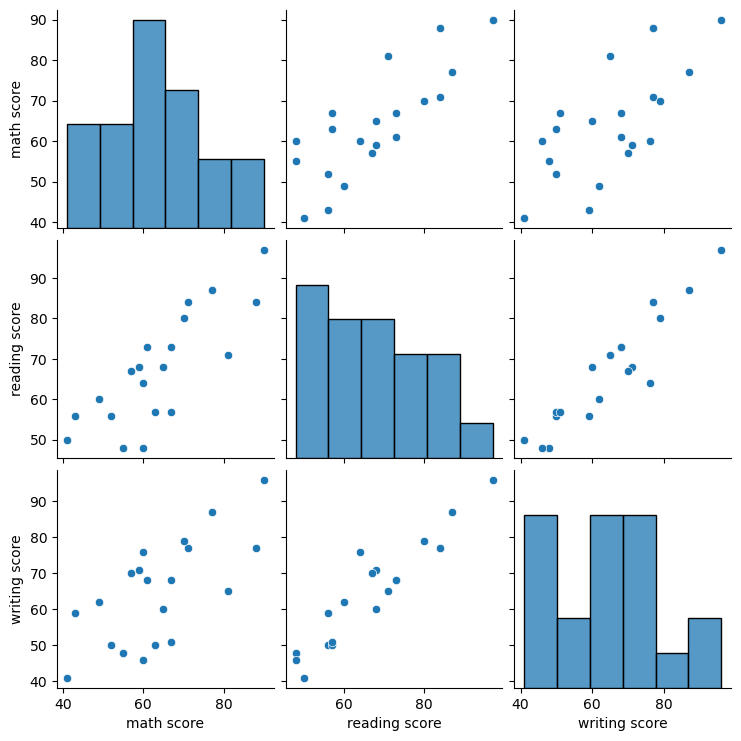

In [123]:

sn.pairplot(df)

In [130]:
#fit a linear regression model with Scipy

import scipy.stats as st

# Assuming you have already defined reading and math as lists or NumPy arrays
print("Length of 'reading':", len(reading))
print("Length of 'math':", len(math))

# Ensuring both arrays have the same length before running the regression
if len(reading) > len(math):
    reading = reading[:len(math)]
elif len(math) > len(reading):
    math = math[:len(reading)]

# Fit the linear regression model
model = st.linregress(x=reading, y=math)

# Print the results
print(f'slope = {round(model.slope,4)}')
print(f'intercept = {round(model.intercept,4)}')
print(f'rvalue = {round(model.rvalue,4)}')
print(f'pvalue = {round(model.pvalue,4)}')
print(f'stderr = {round(model.stderr,4)}')


Length of 'reading': 14
Length of 'math': 18
slope = 0.6331
intercept = 21.6418
rvalue = 0.6017
pvalue = 0.0228
stderr = 0.2426
